In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [16]:
X=data.data
y=data.target


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [20]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()                                

In [22]:
L.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=L.predict(X_test)

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5188113124539249
48.72713760953253


In [42]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [44]:
R.fit(X_train,y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Ridge(alpha=0.0001)

In [46]:
y_pred1=R.predict(X_test)

In [48]:
print(r2_score(y_test,y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

0.5189732635884954
48.71893700181953


In [50]:
from sklearn.datasets import make_regression

In [52]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

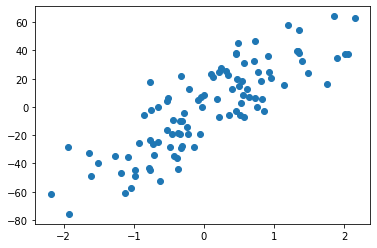

In [54]:
plt.scatter(X,y)

In [58]:
from sklearn.linear_model import LinearRegression

In [62]:
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.2947445586769795


In [64]:
from sklearn.linear_model import Ridge

In [72]:
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [74]:
rr1=Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


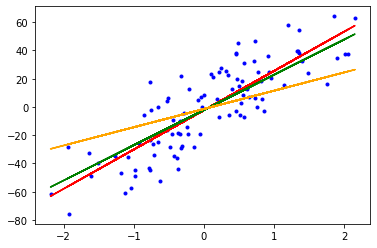

In [78]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')

In [98]:
class RidgeImp:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0

        for i in range(X_train.shape[0]):
            num=num + (y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
            den=den +(X_train[i] - X_train.mean()) * (X_train[i]-X_train.mean())
        self.m=num/(den+self.alpha)
        self.b=y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
        
    def predict(X_test):
        pass
        

In [104]:
reg=RidgeImp(alpha=100)
reg.fit(X,y)


[12.93442104] [-1.42484415]


In [168]:
X,y=load_diabetes(return_X_y=True)

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [206]:
rr2=Ridge(alpha=0.1,solver='cholesky')
rr2.fit(X,y)
print(rr2.intercept_)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
152.13348416289602


In [208]:
rr2.coef_

array([   1.30870543, -207.19241786,  489.69517109,  301.76405786,
        -83.46603399,  -70.8268319 , -188.67889782,  115.7121356 ,
        443.81291747,   86.7493154 ])

In [210]:
y_pred=rr2.predict(X_test)

In [212]:
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.49453476795343476
52.50701928184635


In [180]:
class RidgeImp:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.coef_=None
        self.intercept_=None
        
    def fit(self,X_train,y_train):
       X_train=np.insert(X_train,0,1,axis=1)
       I=np.identity(X_train.shape[1])
       result=np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha *I).dot(X_train.T).dot(y_train)
       self.intercept_=result[0]
       self.coef_=result[1:]
        
    def predict(self,X_test):
        return np.dot(X_test,self.coef_)+self.intercept_

In [214]:
reg1=RidgeImp()
reg1.fit(X_train,y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [216]:
y_pred1=reg1.predict(X_test)

In [218]:
print(r2_score(y_test,y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

0.4692136155993192
53.806111555689604


In [220]:
print(reg1.intercept_,reg1.coef_)

150.84762720023173 [  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
